# Chapter 02: 1 次元データの整理  third

In [1]:
import numpy as np
import pandas as pd

%precision 3

pd.set_option('precision', 3)

In [3]:
# 前回までのこと

df = pd.read_csv('../data/ch2_scores_em.csv', index_col='生徒番号')
scores = np.array(df['英語'])[:10]  # スライスで 10 行分取り出す

# DataFrame を作る

scores_df = pd.DataFrame({'点数':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
                                        name='生徒'))

mean = np.mean(scores)
deviation = scores - mean

summary_df = scores_df.copy()
summary_df['偏差'] = deviation

summary_df['偏差二乗'] = np.square(deviation)

### 2.2.2　範囲と四分位範囲

__範囲__ とは最大値と最小値でばらつきを表現する指標のこと. ２つの値しか見ないため大雑把で外れ値に弱い.

$範囲を R_{g},\\
データの最大値と最小値をそれぞれ x_{max} ~,~ x_{min} とすると \\
R_{g} = x_{max} - x_{min}$

In [4]:
np.max(scores) - np.min(scores)

28

__四分位範囲__ とはデータの 25 %, 50%, 75%, に位置する値をそれぞれ, 第 1 四分位点, 第 2 四分位点, 第 3 四分位点といい Q1, Q2, Q3 で表すとき Q3 - Q1 で定義される指標.

$四分位範囲を IQR とすると\\
IQR = Q3 - Q1$

In [5]:
scores_q1 = np.percentile(scores, 25)
scores_q3 = np.percentile(scores, 75)
scores_iqr = scores_q3 - scores_q1
scores_iqr

15.0

### 2.2.3　データの指標のまとめ

In [6]:
# 便利なメソッドを使う
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 2.3　|　データの正規化

データを統一的な指標に変換することを__正規化__という.

### 2.3.1　標準化

データから平均を引き, 標準偏差で割る操作を__標準化__といい, されたデータを __基準化変量__ や __Z スコア__ という.

$各データを x_{i} とするとき, それを標準化した z_{i} は\\
z_{i} = \frac{x_{i} - \bar{x}}{S} \\
となる.$

In [11]:
z = (scores - np.mean(scores)) / np.std(scores, ddof=0)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [14]:
print(np.mean(z), np.std(z, ddof=0))
# 誤差が入りぎりぎり 1 にならなかった.

-1.6653345369377347e-17 0.9999999999999999


### 2.3.2　偏差値

~~みんなが大好きな~~ __偏差値__ とは平均が 50, 標準偏差が 10 になるように正規化した値のこと.

In [16]:
z = 50 + 10*(scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [17]:
scores_df['偏差値'] = z
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 2.4　|　1 次元データの視覚化

In [18]:
english_scores = np.array(df['英語'])
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 2.4.1　度数分布表

データがとる値を区間ごとに分類し表にまとめたものを__度数分布表__ という. 各区間のことを__階級__, 属している数を__度数__, 各階級の幅を__階級幅__, 階級の個数を__階級数__という.

In [19]:
# 今回は 0 から 100 までを階級数 10 で分類
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [24]:
freq_class = [f'{i} ~ {i + 10}' for i in range(0, 100, 10)]

freq_dist_df = pd.DataFrame({'度数':freq},
                           index=pd.Index(freq_class,
                                         name='階級'))
freq_dist_df

,度数
階級,
0 ~ 10,0
10 ~ 20,0
20 ~ 30,0
30 ~ 40,2
40 ~ 50,8
50 ~ 60,16
60 ~ 70,18
70 ~ 80,6
80 ~ 90,0


In [25]:
# 階級値を求める
class_value = [(i + (i + 10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

__相対度数__ とは全データ数に対してその階級のデータの割合を示す指標.

In [26]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

その階級までの相対度数の和を__累積相対度数__という.

In [27]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [28]:
# 度数分布表に加えていく
freq_dist_df['階級値'] = class_value
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
freq_dist_df

,度数,階級値,相対度数,累積相対度数
階級,,,,
0 ~ 10,0,5,0.00,0.00
10 ~ 20,0,15,0.00,0.00
20 ~ 30,0,25,0.00,0.00
30 ~ 40,2,35,0.04,0.04
40 ~ 50,8,45,0.16,0.20
50 ~ 60,16,55,0.32,0.52
60 ~ 70,18,65,0.36,0.88
70 ~ 80,6,75,0.12,1.00
80 ~ 90,0,85,0.00,1.00


In [29]:
# 最頻値を求める
freq_dist_df.loc[freq_dist_df['度数'].idxmax(), '階級値']

65

### 2.4.2　ヒストグラム

__ヒストグラム__ とは度数分布表を棒グラフで表たもの

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

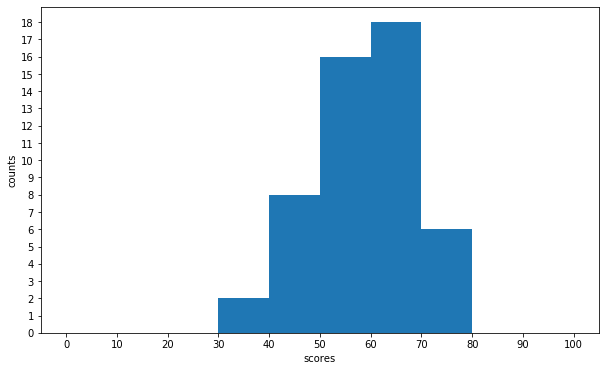

In [35]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))

# 日本語使えない
ax.set_xlabel('scores')
ax.set_ylabel('counts')

ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

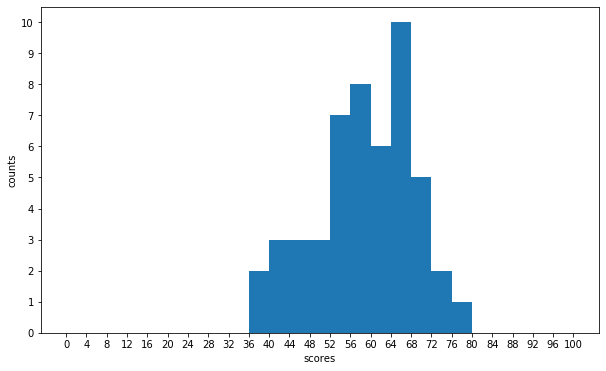

In [36]:
# 階級幅を 4 にして階級数を増やしてみる

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# bins を 10 から 25 にした
freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))

# 日本語使えない
ax.set_xlabel('scores')
ax.set_ylabel('counts')

ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

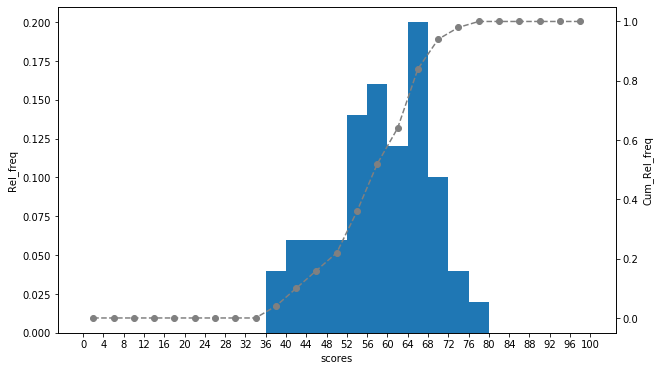

In [39]:
# 累積度数の折れ線グラフと一緒に描画

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx()

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

ax2.plot(class_value, cum_rel_freq,
        ls='--', marker='o', color='gray')

ax2.grid(visible=False)

ax1.set_xlabel('scores')
ax1.set_ylabel('Rel_freq')
ax2.set_ylabel('Cum_Rel_freq')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 2.4.3　箱ひげ図

__箱ひげ図__ とは四分位範囲をグラフ化したもの.

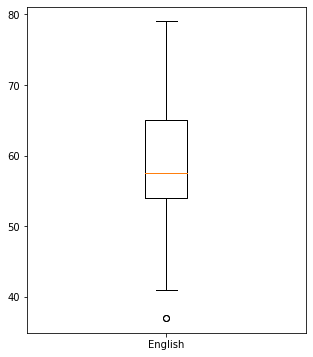

In [41]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['English'])

plt.show()